# Projeto Python IA: Inteligência Artificial e Previsões

### Case: Score de Crédito dos Clientes

Você foi contratado por um banco para conseguir definir o score de crédito dos clientes. Você precisa analisar todos os clientes do banco e, com base nessa análise, criar um modelo que consiga ler as informações do cliente e dizer automaticamente o score de crédito dele: Ruim, Ok, Bom

Arquivos da aula: https://drive.google.com/drive/folders/1FbDqVq4XLvU85VBlVIMJ73p9oOu6u2-J?usp=drive_link

In [ ]:
!pip install pandas numpy scikit-learn
!pip install fbprophet
!pip install pystan==2.19.1.1 pip install fbprophet
!pip install matplotlib




In [75]:
import pandas as pd 
tabela = pd.read_csv("clientes (1).csv", sep= ';')
display(tabela)

,id_cliente,mes,idade,produto,preco,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,galaxys23,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465.380.264.657.100,alto_gasto_pagamento_baixos,31.249.408.867.943.600,Good,1,1,1,1,0
1,3392,2,23.0,galaxys23,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465.380.264.657.100,baixo_gasto_pagamento_alto,28.462.916.249.607.100,Good,1,1,1,1,0
2,3392,3,23.0,galaxys23,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465.380.264.657.100,baixo_gasto_pagamento_medio,3.312.098.628.537.910,Good,1,1,1,1,0
3,3392,4,23.0,galaxys23,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465.380.264.657.100,baixo_gasto_pagamento_baixo,22.345.130.972.736.700,Good,1,1,1,1,0
4,3392,5,23.0,galaxys23,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465.380.264.657.100,alto_gasto_pagamento_medio,34.148.923.103.222.100,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,Razer. Kraken X Lite,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,2.402.847.744.864.440,alto_gasto_pagamento_alto,47.986.622.816.574.000,Poor,1,0,0,0,1
99996,37932,5,25.0,Razer. Kraken X Lite,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,2.402.847.744.864.440,alto_gasto_pagamento_medio,496.651.610.435.322,Poor,1,0,0,0,1
99997,37932,6,25.0,Razer. Kraken X Lite,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,2.402.847.744.864.440,alto_gasto_pagamento_alto,5.168.090.832.742.810,Poor,1,0,0,0,1
99998,37932,7,25.0,Razer. Kraken X Lite,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,2.402.847.744.864.440,baixo_gasto_pagamento_alto,3.191.649.785.257.090,Standard,1,0,0,0,1


In [76]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   produto                   100000 non-null  object 
 4   preco                     100000 non-null  object 
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

None

In [77]:
from sklearn.preprocessing import LabelEncoder
codificador = LabelEncoder()
tabela["produto"] = codificador .fit_transform(tabela["produto"])
tabela["preco"] = codificador .fit_transform(tabela["preco"])
tabela["investimento_mensal"] = codificador .fit_transform(tabela["investimento_mensal"])
tabela["comportamento_pagamento"] = codificador .fit_transform(tabela["comportamento_pagamento"])
tabela["saldo_final_mes"] = codificador .fit_transform(tabela["saldo_final_mes"])
tabela["mix_credito"] = codificador .fit_transform(tabela["mix_credito"])
tabela["taxa_uso_credito"] = codificador .fit_transform(tabela["taxa_uso_credito"])

display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   produto                   100000 non-null  int32  
 4   preco                     100000 non-null  int32  
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int32  
 13  divida_total              100000 non-null  fl

None

In [78]:
y = tabela["score_credito"]
x = tabela.drop(columns=["id_cliente", "score_credito"])
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
modelo_arvoredecisao = RandomForestClassifier()
modelo_knn =KNeighborsClassifier()
modelo_arvoredecisao.fit(x_treino,y_treino)
modelo_knn.fit (x_treino,y_treino)

KNeighborsClassifier()

In [80]:
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_knn= modelo_knn.predict(x_teste)
from sklearn.metrics import accuracy_score
display(accuracy_score(y_teste, previsao_arvoredecisao))
display(accuracy_score(y_teste, previsao_knn))

0.8257

0.4726

In [73]:
novos_clientes = pd.read_csv("novos_clientes (1).csv", sep= ';')
novos_clientes["produto"] = codificador.fit_transform(novos_clientes["produto"])
novos_clientes["preco"] = codificador .fit_transform(novos_clientes["preco"])
novos_clientes["investimento_mensal"] = codificador .fit_transform(novos_clientes["investimento_mensal"])
novos_clientes["comportamento_pagamento"] = codificador .fit_transform(novos_clientes["comportamento_pagamento"])
novos_clientes["saldo_final_mes"] = codificador.fit_transform(novos_clientes["saldo_final_mes"])
novos_clientes["mix_credito"] = codificador .fit_transform(novos_clientes["mix_credito"])
novos_clientes["taxa_uso_credito"] = codificador .fit_transform(novos_clientes["taxa_uso_credito"])

display(novos_clientes)


,mes,idade,produto,preco,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,2,0,6.0,7.0,17.0,5.0,52.0,19.0,...,1,218.0,2,1,1,1,1,0,0,0
1,4,32.0,1,2,5.0,5.0,10.0,3.0,25.0,18.0,...,0,12.0,1,2,0,0,0,0,0,1
2,2,48.0,0,1,8.0,6.0,14.0,7.0,24.0,14.0,...,2,215.0,0,0,2,0,1,0,1,0


In [74]:
previsao = modelo_arvoredecisao.predict(novos_clientes)
display (previsao)

array(['Poor', 'Good', 'Standard'], dtype=object)

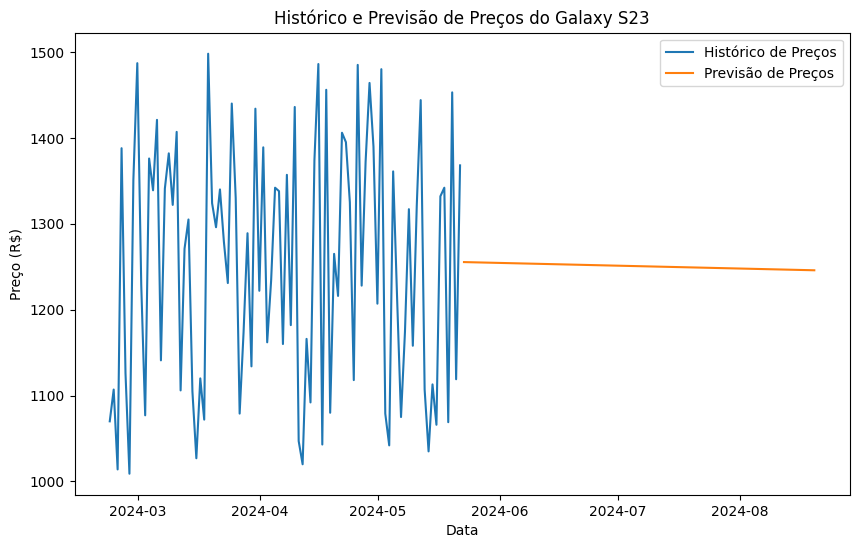

Preço atual do Galaxy S23: R$1200.00
Preço há 3 meses: R$1070.00
Previsão de preço daqui a 3 meses: R$1245.87


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta


data_atual = datetime.now()
preco_atual = 1200.0  


historico_datas = [data_atual - timedelta(days=i) for i in range(90)]
historico_precos = np.random.randint(1000, 1500, size=90)  


dias_desde_inicio = np.array([(data_atual - data).days for data in historico_datas]).reshape(-1, 1)


modelo = LinearRegression()
modelo.fit(dias_desde_inicio, historico_precos)


proximos_90_dias = np.array([data_atual + timedelta(days=i) for i in range(1, 91)])
dias_desde_inicio_proximos = np.array([(proxima_data - data_atual).days for proxima_data in proximos_90_dias]).reshape(-1, 1)
precos_previstos = modelo.predict(dias_desde_inicio_proximos)


plt.figure(figsize=(10, 6))
plt.plot(historico_datas, historico_precos, label='Histórico de Preços')
plt.plot(proximos_90_dias, precos_previstos, label='Previsão de Preços')
plt.title('Histórico e Previsão de Preços do Galaxy S23')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()
plt.show()


print(f"Preço atual do Galaxy S23: R${preco_atual:.2f}")
print(f"Preço há 3 meses: R${historico_precos[-1]:.2f}")
print(f"Previsão de preço daqui a 3 meses: R${precos_previstos[-1]:.2f}")